In [2]:
import requests
import numpy as np
import json
import random
from sklearn.datasets import *
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import sklearn.metrics as metrics
from sklearn.cluster import DBSCAN
from itertools import cycle
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()


def generated_random_value():
    list_values = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 1.0]
    return random.choice(list_values)


def get_data_from_api(url, token):
    try:
        response = requests.get(url, headers={'Authorization': 'Token {}'.format(token)})
        data = response.json()
        return data
    except:
        print("error")


def write_json_to_file(data, name_file):
    try:
        with open(name_file, 'w') as f:
            json.dump(data, f)
    except:
        print("error")


def read_file():
    with open(r'C:\Users\carlo\Desktop\Algoritmo_Clustering-Estágio\DBSCAN_pickup_points\data_requests2.json') as json_file:
        data = json.load(json_file)
        return data


# function to create an array of numpy
def convert_to_a_numpy_array(list_coords):
    coords = np.array(list_coords)
    return coords


# function to get the number of clusters - noise points are identified with "-1"
def get_number_of_clusters(cluster_labels):
    try:
        num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        return num_clusters
    except:
        print("error.")


# url of api
url_of_transport_orders_api = "http://127.0.0.1:8000/api/list_transport_orders_test/"
# token of the user of django app - admin
token_of_admin = "1f6d9b2fa03b38de8944a6c36eac2f378a8a8038"



Pickup coordinates from requests [[40.2118237, -8.4073918], [40.2034775, -8.3917008], [40.20564, -8.41955], [40.2114396, -8.4017142], [40.1863057, -8.4105761], [40.2136408, -8.4132747], [40.192684, -8.4161041], [40.1988306, -8.4094242], [40.2137646, -8.4196539], [40.20564, -8.41955], [40.1985123, -8.3983747], [40.2127056, -8.4147654], [40.20564, -8.41955], [40.1988306, -8.4094242], [40.2146874, -8.4109324], [40.2186529, -8.4110837], [40.2311681, -8.4131296], [40.205864, -8.3937105], [40.216066, -8.3855833], [40.1855523, -8.4108297], [40.2178502, -8.411275], [40.2179178, -8.4044542], [40.1997967, -8.4210516], [40.2159945, -8.4047184], [40.2135852, -8.4208427], [40.20564, -8.41955], [40.215234, -8.4101221], [40.1954529, -8.3967275], [40.1933752, -8.3980291], [40.20564, -8.41955], [40.2009025, -8.404674], [40.2127056, -8.4147654], [40.215162, -8.4053514], [40.2119035, -8.4027546], [40.1831208, -8.4136809], [40.2214226, -8.4312096], [40.224255, -8.4087522], [40.2023543, -8.4030083], [40.20

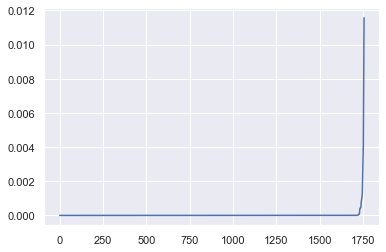

In [3]:
d = get_data_from_api(url_of_transport_orders_api, token_of_admin)

# write json data to file
write_json_to_file(d, r'C:\Users\carlo\Desktop\Algoritmo_Clustering-Estágio\DBSCAN_pickup_points\data_requests2.json')

data = read_file()
# two list s - one for pickup points from the passengers,the second is two dropoff points
list_coords_pickup_points = []
list_coords_dropoff_points = []
for p in data:
    list_coords_pickup_points.append([p['pickup_latitude'], p['pickup_longitude']])
    list_coords_dropoff_points.append([p['dropoff_latitude'], p['dropoff_longitude']])
print("Pickup coordinates from requests", list_coords_pickup_points)
print("Dropoff coordinates from requests", list_coords_dropoff_points)


neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(list_coords_pickup_points)
distances, indices = nbrs.kneighbors(list_coords_pickup_points)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

# o valor ideal para o epsilon será encontrado no ponto de curvatura máxima
plt.plot(distances)



In [4]:
X= []
X= list_coords_pickup_points

#Vamos escalar e standarizar os dados
X = StandardScaler().fit_transform(X)
print(X) 


[[ 0.27117374  0.01180468]
 [-0.19268194  0.42767945]
 [-0.07249696 -0.31043665]
 ...
 [-0.79663579 -0.45675216]
 [-1.15399507 -0.22620153]
 [-0.82651391  0.09514661]]


Total number of clusters 289
[ True  True  True ...  True  True  True]
Number total of clusters with noise 289
Number final of cluster 289
Silhouette coefficient: 0.957
1757
1757


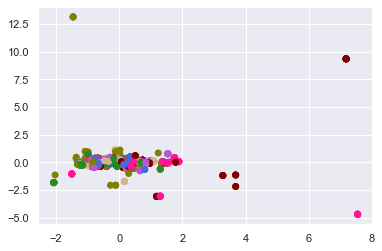

In [9]:
#settting up DBSCAN
dbscan = DBSCAN(eps=0.0005, min_samples=2)

# fitting model
model = dbscan.fit(X)

labels = model.labels_
n_clusters= len(set(labels))
print("Total number of clusters",n_clusters)

# identificar quais os pontos que compõe os nossos "pontos centrais"
core_samples = np.zeros_like(labels,dtype = bool)

core_samples[dbscan.core_sample_indices_] = True
print(core_samples)

# calcula o número de clusters
n_clus = len(set(labels))
print("Number total of clusters with noise",n_clus)
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
print("Number final of cluster",n_clusters)


"""
Métricas para medir o desempenho do DBSCAN
Silhuete score: A pontuação da silhueta é calculada utilizando a distância intra-cluster média entre
os pontos, e a distância média mais próxima do cluster.
Por exemplo, um cluster com muitos pontos de dados muito próximos uns dos outros (alta densidade)
e está longe do próximo cluster mais próximo (sugerindo que o cluster é muito original em comparação com o próximo mais próximo),
terá uma pontuação forte de silhueta.
Uma pontuação de silhueta varia de -1 a 1, com -1 sendo a pior pontuação possível e 1 sendo a melhor pontuação. As contagens da silhueta de 0 sugerem conjuntos de sobreposição.

"""
print("Silhouette coefficient: %0.3f" % metrics.silhouette_score(X,labels))


colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive']
#vectorizer = np.vectorize(lambda x: colors[x % len(colors)]) 
colors2 = []
for i in labels:
    colors2.append(colors[i % len(colors)])
colors2= np.array(colors2)

X = np.array(X)
print(len(X))
print(len(X[:,0]))
plt.scatter(X[:,0],X[:,1],c=colors2)